In [122]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as ss

In [123]:

df= pd.read_csv('iris.csv')
print (df.sample(5))
del df['Id']

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
4      5            5.0           3.6            1.4           0.2   
148  149            6.2           3.4            5.4           2.3   
123  124            6.3           2.7            4.9           1.8   
11    12            4.8           3.4            1.6           0.2   
52    53            6.9           3.1            4.9           1.5   

             Species  
4        Iris-setosa  
148   Iris-virginica  
123   Iris-virginica  
11       Iris-setosa  
52   Iris-versicolor  


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [125]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [126]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [127]:
df['Species'].value_counts()
print(df.keys())

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


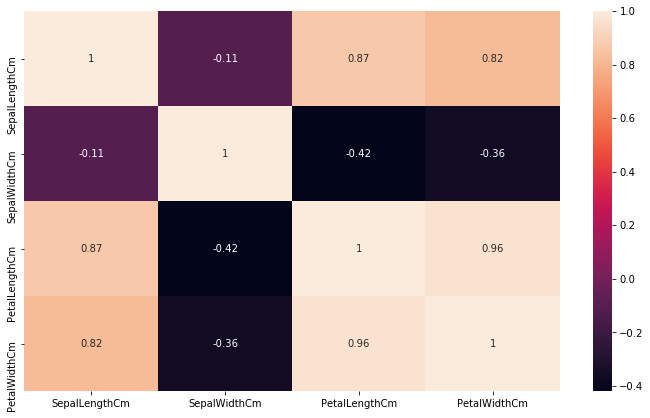

In [128]:
plt.figure(figsize=(12,7))
ss.heatmap(df.corr(),annot=True)

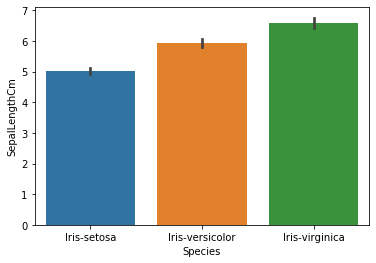

In [129]:
ss.barplot(x='Species',y='SepalLengthCm',data=df)

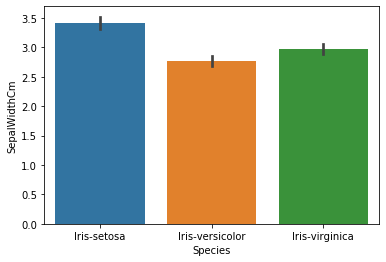

In [130]:
ss.barplot(x='Species',y='SepalWidthCm',data=df)


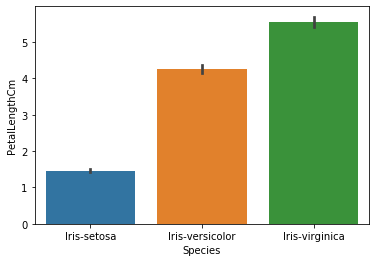

In [131]:
ss.barplot(x='Species',y='PetalLengthCm',data=df)


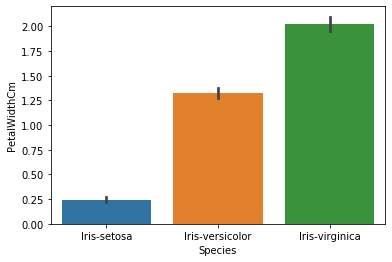

In [132]:
ss.barplot(x='Species',y='PetalWidthCm',data=df)

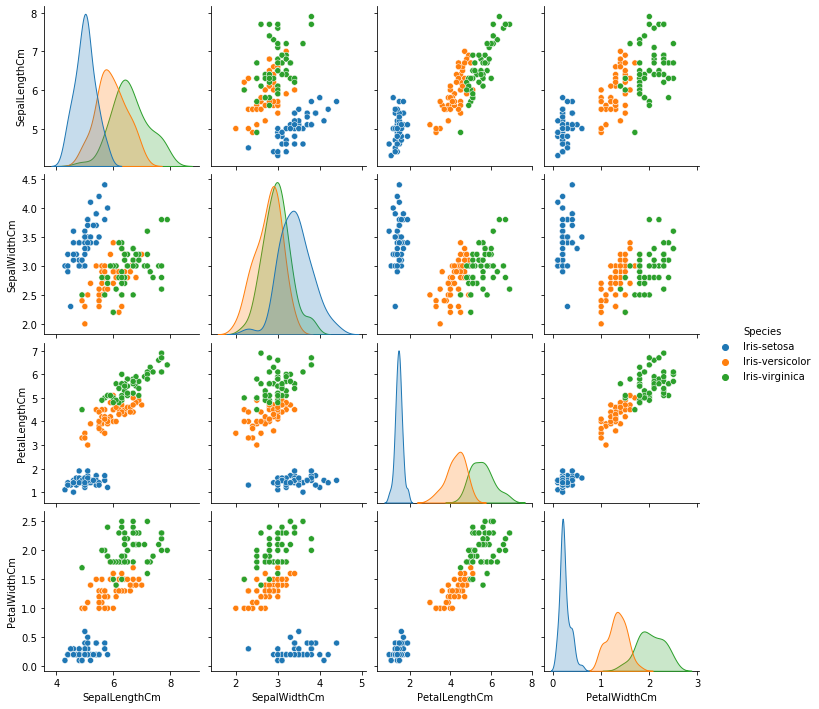

In [133]:
ss.pairplot(df, hue='Species')

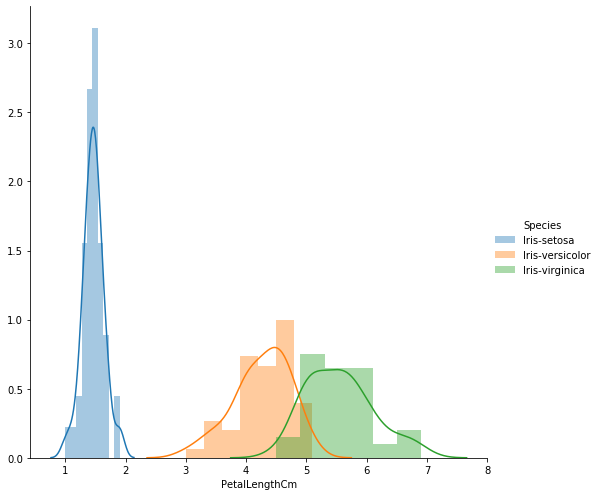

In [134]:
ss.FacetGrid(df,hue="Species",height=7)\
   .map(ss.distplot,"PetalLengthCm")\
   .add_legend();
plt.show()

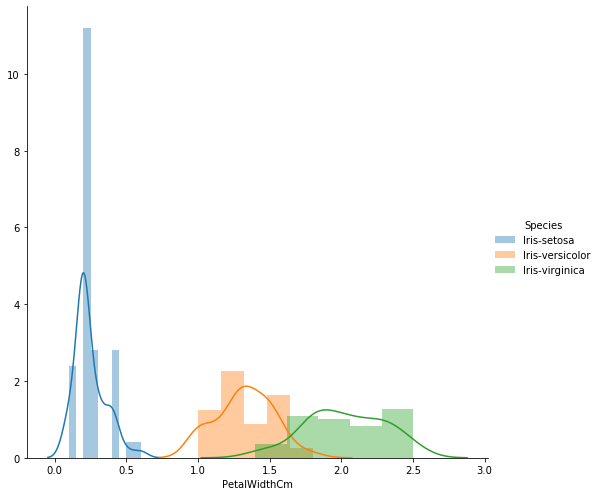

In [135]:
ss.FacetGrid(df,hue="Species",height=7)\
   .map(ss.distplot,"PetalWidthCm")\
   .add_legend();
plt.show()

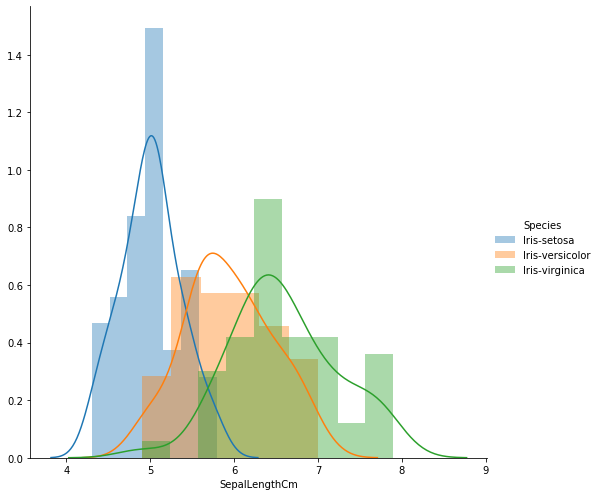

In [136]:
ss.FacetGrid(df,hue="Species",height=7)\
   .map(ss.distplot,"SepalLengthCm")\
   .add_legend();
plt.show()

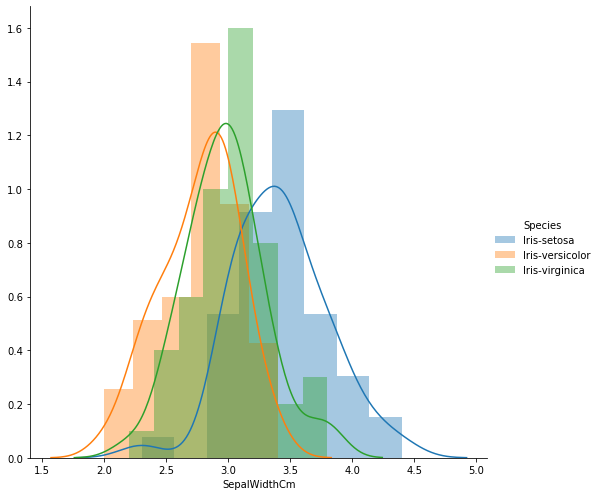

In [137]:
ss.FacetGrid(df,hue="Species",height=7)\
   .map(ss.distplot,"SepalWidthCm")\
   .add_legend();
plt.show()

In [138]:
X = df.iloc[:, 0:4].values

In [139]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

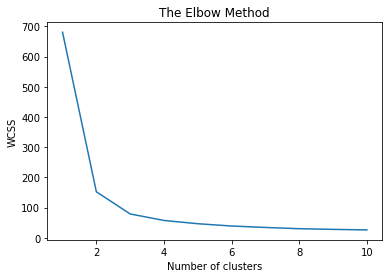

In [140]:
plt.plot(range(1,11), wcss)  
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [141]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [142]:
y_kmeans.shape

(150,)

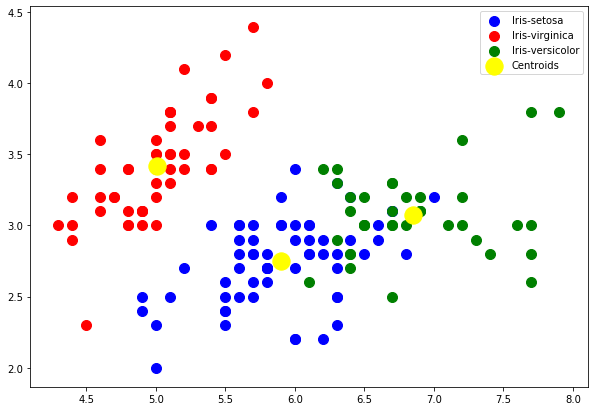

In [143]:
plt.figure(figsize=(10,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa ')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Iris-virginica')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-versicolor')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()


